Brain Stroke Prediction CT Scan
Using Deep Learning (CNN)
Through TensorFlow / Keras

Cleaning The Dataset

In [4]:
import tensorflow as tf
import os
import cv2
import imghdr

DatasetDir = 'Dataset'

ImageExts = ['jpeg', 'jpg', 'bmp', 'png']

for ImageClass in os.listdir(DatasetDir): 
    for Image in os.listdir(os.path.join(DatasetDir, ImageClass)):
        ImagePath = os.path.join(DatasetDir, ImageClass, Image)
        try: 
            Img = cv2.imread(ImagePath)
            ImgExt = imghdr.what(ImagePath)
            if ImgExt not in ImageExts:
                print(f'This image is going to be deleted because it\'s extension is not compatible : {ImagePath}')
                os.remove(ImagePath)
        except Exception as e:
            print(f'Issue with image {ImagePath}')

Loading the Dataset

Found 1843 files belonging to 2 classes.
Found 437 files belonging to 2 classes.
Found 235 files belonging to 2 classes.


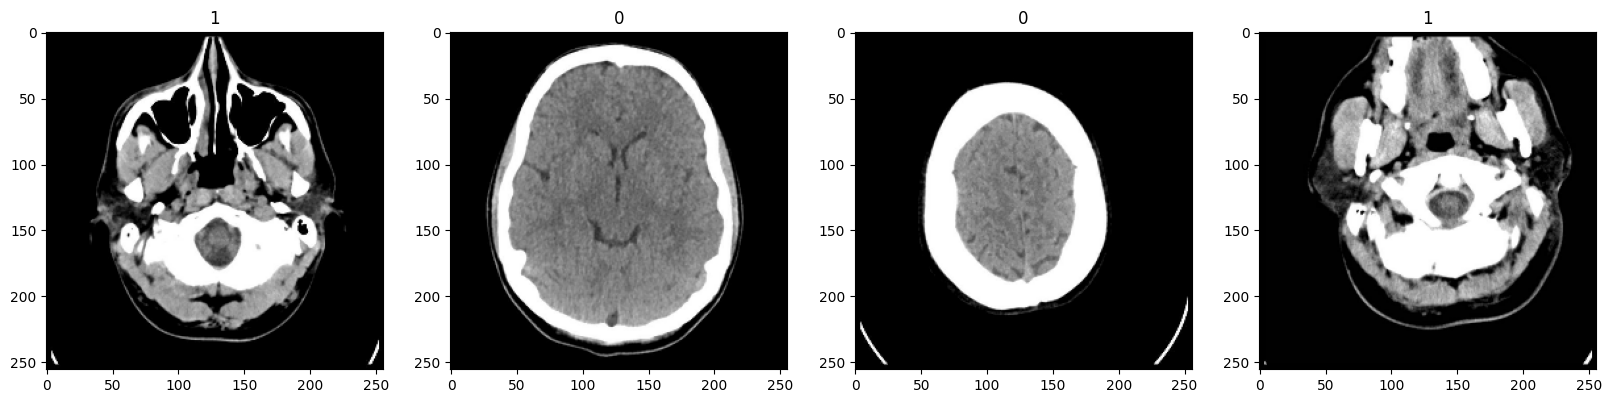

In [21]:
import numpy as np
from matplotlib import pyplot as plt

TrainingData = tf.keras.utils.image_dataset_from_directory('Dataset/Train').map(lambda x,y: (x/255, y))
TestingData = tf.keras.utils.image_dataset_from_directory('Dataset/Test').map(lambda x,y: (x/255, y))
ValidationData = tf.keras.utils.image_dataset_from_directory('Dataset/Validation').map(lambda x,y: (x/255, y))

DataIterator = TrainingData.as_numpy_iterator()

Batch = DataIterator.next()

Fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(Batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(Batch[1][idx])

The Deep Learning Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Model = Sequential()

Model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
Model.add(MaxPooling2D())
Model.add(Conv2D(32, (3,3), 1, activation='relu'))
Model.add(MaxPooling2D())
Model.add(Conv2D(16, (3,3), 1, activation='relu'))
Model.add(MaxPooling2D())
Model.add(Flatten())
Model.add(Dense(256, activation='relu'))
Model.add(Dense(1, activation='sigmoid'))

Model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

Model.summary()

c:\Users\asusg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [26]:
LogDir='logs'
Tensorboard_Callback = tf.keras.callbacks.TensorBoard(log_dir=LogDir)
History = Model.fit(TrainingData, epochs=20, validation_data=ValidationData, callbacks=[Tensorboard_Callback])

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.5443 - loss: 62.9972 - val_accuracy: 0.8213 - val_loss: 0.4850
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.8022 - loss: 0.4432 - val_accuracy: 0.9234 - val_loss: 0.2557
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.9355 - loss: 0.1960 - val_accuracy: 0.9660 - val_loss: 0.1240
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.9819 - loss: 0.0718 - val_accuracy: 0.9745 - val_loss: 0.0696
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.9964 - loss: 0.0212 - val_accuracy: 0.9787 - val_loss: 0.0674
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9975 - loss: 0.0076 - val_accuracy: 0.9830 - val_loss: 0.0661
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9830 - val_loss: 0.0798
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9830 - 

Model Performance

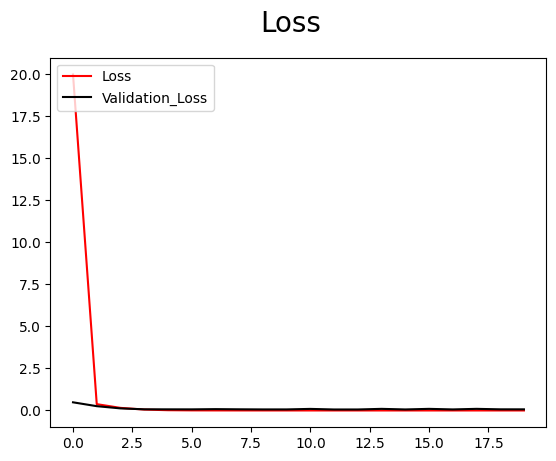

In [28]:
Fig = plt.figure()
plt.plot(History.history['loss'], color='red', label='Loss')
plt.plot(History.history['val_loss'], color='black', label='Validation_Loss')
Fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

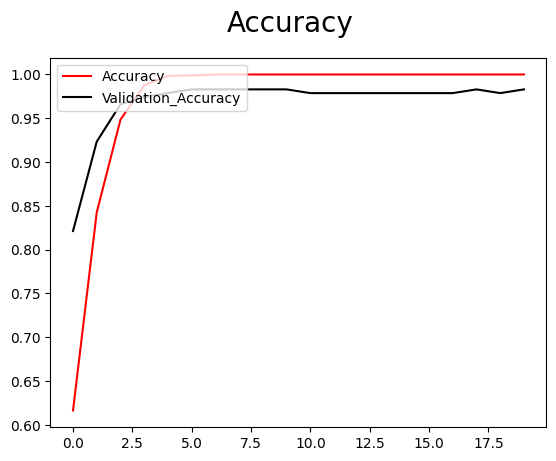

In [30]:
Fig = plt.figure()
plt.plot(History.history['accuracy'], color='red', label='Accuracy')
plt.plot(History.history['val_accuracy'], color='black', label='Validation_Accuracy')
Fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluation